In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

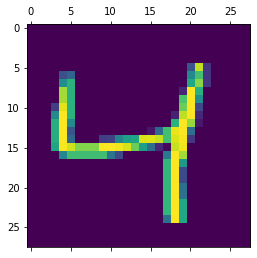

In [6]:
plt.matshow(X_train[2])

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
y_train[2]

4

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
X_test_flattened.shape

(10000, 784)

In [12]:
#Creating a simple neural network
#with input layer of inputs and 10 outputs

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

#tensorboard
tb_callback = tf.keras.callbacks.TensorBoard(log_dir = "logs/", histogram_freq = 1)
model.compile(
    optimizer = 'SGD',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
    
model.fit(X_train_flattened, y_train, epochs = 5, callbacks = [tb_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1282 - accuracy: 0.7169
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4777 - accuracy: 0.8762
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4139 - accuracy: 0.8886
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3738 - accuracy: 0.8975
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3628 - accuracy: 0.9005


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3349 - accuracy: 0.9073


[0.33486583828926086, 0.9072999954223633]

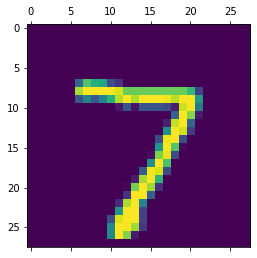

In [15]:
plt.matshow(X_test[0])

In [16]:
y_predicted = model.predict(X_test_flattened)

y_predicted[0]

array([0.5537305 , 0.00353441, 0.51470655, 0.8769895 , 0.15467715,
       0.24627414, 0.01068339, 0.99976766, 0.45093718, 0.91464365],
      dtype=float32)

In [17]:
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    1,    5,    7,    1,    3,    0],
       [   0, 1102,    2,    3,    1,    2,    4,    1,   20,    0],
       [  12,    8,  889,   17,   17,    1,   16,   19,   44,    9],
       [   5,    1,   18,  905,    1,   30,    4,   15,   20,   11],
       [   1,    5,    5,    0,  908,    1,   11,    1,    8,   42],
       [  12,    3,    3,   41,   13,  748,   18,   11,   34,    9],
       [  15,    3,    4,    3,   13,   15,  902,    1,    2,    0],
       [   4,   18,   25,    5,    9,    0,    0,  924,    3,   40],
       [   9,    9,   10,   24,    8,   23,   13,   16,  847,   15],
       [  11,    8,    5,   11,   45,   10,    0,   24,    6,  889]])>

Text(69.0, 0.5, 'Actual')

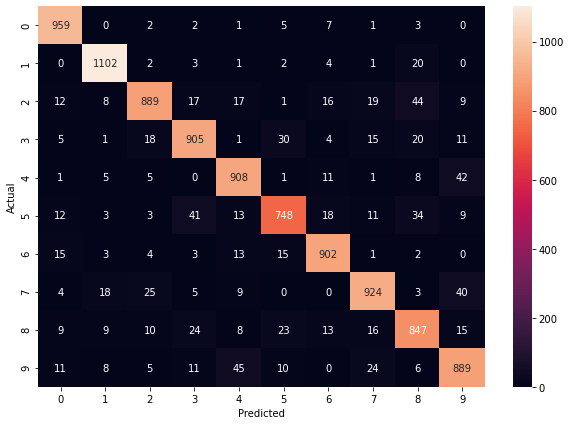

In [20]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [21]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
    
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4467 - accuracy: 0.8725
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1301 - accuracy: 0.9620
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0871 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0516 - accuracy: 0.9846


In [22]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0761 - accuracy: 0.9757


[0.07607432454824448, 0.9757000207901001]

In [23]:
#inbuilt keras flattening

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(
    optimizer = 'SGD',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
    
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0579 - accuracy: 0.7301
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3594 - accuracy: 0.8996
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2985 - accuracy: 0.9162
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2676 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2374 - accuracy: 0.9343


In [ ]:
#loading tensorboard inbuilt
%load_ext tensorboard
%tensorboard --logdir logs/fit